In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### preparation

import data
spilt the "courseID" "name" "content" "requisite"

In [ ]:
cd /content/gdrive/My Drive/final

/content/gdrive/My Drive/final


In [ ]:
!unzip subject.zip

In [ ]:
cd /content/gdrive/My Drive/final/subject

/content/gdrive/My Drive/final/subject


In [ ]:
!ls

In [ ]:
import glob
import os
import csv
import sys
import gensim
import sklearn
import numpy as np
from numpy import asarray
from numpy import save
from numpy import load

In [ ]:
from gensim.models.doc2vec import Doc2Vec, LabeledSentence
 
TaggededDocument = gensim.models.doc2vec.TaggedDocument

li=list()
csvObj = 'subject.csv'
path = os.path.join(os.getcwd(), csvObj)
print(path)
if os.path.exists(path):
    os.remove(path)
# create new csv file
with open(path, 'w',newline='') as f:
    csv_header = ["Name", "Content"]
    csv_writer = csv.DictWriter(f, fieldnames=csv_header)
    csv_writer.writeheader()

print(os.path.exists(path))


/content/gdrive/My Drive/final/subject/subject.csv
True


In [ ]:
txtfile = "finalreult.csv"
for txtfile in glob.glob('*.txt'):
  filetemp = open(txtfile,"r",encoding = "ISO-8859-1")
  text = filetemp.readlines()
  result = str(text).replace('\\t',"")
  result = result.replace('\\n\','," ")
  result = result.replace('\\n'," ")
  result = result.replace("\'"," ")
  result = result.replace("    "," ")
  result = result.replace("   "," ")
  result = result.replace("  "," ")
  result = result.replace("("," ")
  result = result.replace(")"," ")
  result = result.replace(":"," ")
  result = result.replace(";"," ")
  position = result.find('Teaching and learning strategies')
  if(position>0):
    result = result[:position]
  with  open(path, 'a+',newline='') as f:
    title = txtfile[:-4]
    csv_write = csv.writer(f)
    data_row = [title, result]
    csv_write.writerow(data_row)
    f.flush()


In [ ]:
result

'[  15603 Strategic Planning UTS  Design, Architecture and Building  Institute for Public Policy and GovernanceCredit points  6 cpSubject level  Postgraduate Result type  Grade and marks   Requisite s   15604 Local Government Principles and Practice OR 49460 Local Government Management Principles and Practice 1 OR 15608 Organising and Managing in Local Government OR 49277 Corporate Planning and Management These requisites may not apply to students in certain courses. There are course requisites for this subject. See access conditions. Description This subject is an elective in the Master of Local Government  C04257 , Graduate Diploma in Local Government  C06033  and Graduate Certificate in Development Assessment  C11204 . Strategic planning focuses on the future, how to set appropriate goals and ways to achieve them. This subject explores strategic planning processes and analyses the factors that contribute to the sustainable functioning of organisations. The origins of strategic plann

In [ ]:
subObj = 'finalresult - finalresult-2.csv'
path_sub = os.path.join(os.getcwd(), subObj)
resultObj = 'finalfinalresult.csv'
path_res = os.path.join(os.getcwd(), resultObj)


if os.path.exists(path_res):
    os.remove(path_res)
# create new csv file
with open(path_res, 'w',newline='') as f:
  csv_header = ["Name","faculty","X","Y","Z","Content"]
  csv_writer = csv.DictWriter(f, fieldnames=csv_header)
  csv_writer.writeheader()
  with open(path_sub,'r',encoding="ISO-8859-1") as subject:
      sub_reader = csv.DictReader(subject)
      for row in sub_reader:
        content = row['Content']
        pos = content.find('UTS:')
        faculty = content[pos+5:].split(' ',1)[0]
        csv_writer.writerow({"Name":row['Name'], "faculty":faculty, "Content": row['Content'] })
        print(faculty)
      subject.flush()
      subject.close()
  f.flush()
  f.close() 


In [ ]:
resultObj = 'finalresult - finalresult-2.csv'
path_res = os.path.join(os.getcwd(), resultObj)

content_li = list()
faculty_li = list()

with open(path_res,'r',encoding="ISO-8859-1") as f:
  sub_reader = csv.DictReader(f)
  for row in sub_reader:
    content_li.append(row['Content'])
    faculty_li.append(row['faculty'])
  f.flush()
  f.close()


In [ ]:
content_li

In [ ]:
corpus =content_li

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en")
nlp.vocab["UTS"].is_stop = True
nlp.vocab["requisites"].is_stop = True
nlp.vocab["s"].is_stop = True
nlp.vocab["Description"].is_stop = True
nlp.vocab["cpresult"].is_stop = True
nlp.vocab["requisite"].is_stop = True
nlp.vocab["6"].is_stop = True
nlp.vocab["0"].is_stop = True
nlp.vocab["4"].is_stop = True
nlp.vocab["48"].is_stop = True
nlp.vocab["8"].is_stop = True
nlp.vocab["32"].is_stop = True

In [ ]:
arry = []
for a in corpus:
  
  doc = nlp(a)
  
  lemma=[]
  #print(doc)
  for token in doc:
    
    if token.is_stop == False and token.is_punct == False:
      token = token.lemma_.strip().lower()
      lemma.append(token)
      s=" ".join(lemma)
  arry.append(s)

arry

[' 92015 fundamental mental health nursing graduate entry health  92017 health assessment nursing therapeutics   access condition student explore range issue relate promotion health nursing care people need mental health care impact family carer importance mental health nursing health care setting include inpatient communitybase service knowledge attitude skill require contemporary mental health nursing practice x96 interpersonal skill build maintain therapeutic relationship assessment process therapeutic intervention development partnership consumer recovery interprofessional collaboration reflective practice x96 explore mental health nursing practice place consumer centre mental health service key feature  successful completion  student able   reflect personal societal attitude belief value impact people experience mental health problem nmba 5  b  demonstrate understanding local global history mental health care nmba  c  incorporate promotion strength wellness health care people ment

In [ ]:
save('final_csv.npy', arry)

In [ ]:
arry = load('final_csv.npy')

### **TF-IDF**

In [ ]:
import pandas as pd
import numpy as np
from scipy.linalg import norm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(arry)
print(vectorizer.get_feature_names())
print(X.toarray())


['0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009', '001', '0012', '0013', '0013use', '0014', '0014describe', '0015', '0016', '0017', '0018', '0019', '002', '0020', '0022', '0023', '0024', '0025', '0028', '0029', '003', '0030', '0031', '0032', '0033', '0034', '0035', '0036', '0037', '0038', '0039', '004', '0040', '0041', '0042', '0043', '0044', '0045', '0046', '0047', '0048', '0049', '005', '0050', '0051', '0052', '0053', '0054', '0055', '0056', '0057', '0058', '0059', '006', '0060', '0061', '0062', '0063', '0064', '0065', '0066', '0067', '0068', '0069', '006contribute', '007', '0070', '0071', '0072', '0073', '0074', '0075', '0077', '0078', '0079', '008', '0080', '0081', '0082', '0083', '0084', '0085', '0086', '0087', '0088', '0089', '009', '0090', '0091', '0092', '0093', '0094', '0095', '0096', '0097', '0098', '0099', '01', '010', '0100', '010039', '010042', '010043', '010044', '010045', '010050', '010051', '010052', '010070', '010071', '010077', '0100integrate', 

In [ ]:
vectorizer.get_feature_names

<bound method CountVectorizer.get_feature_names of CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)>

In [ ]:
data_frame = pd.DataFrame(data=X.todense(),columns=vectorizer.get_feature_names())
data_frame[0]

In [ ]:
import pandas as pd
import numpy as np
from scipy.linalg import norm
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(tokenizer=lambda s: s.split())
vectors = cv.fit_transform(arry).toarray()
print("The length of each vector is",len(vectors[0]))
print("There are",len(vectors),"vectors in whole corpus")

The lenth of each vector is 22354
There are 3325 vectors in whole corpus


In [ ]:
#cosine similarity
sim = np.dot(vectors[0], vectors[1]) / (norm(vectors[0]) * norm(vectors[1]))
sim

0.039259984919999685

In [ ]:
#write cosine similarity into csv
resultObj = 'finalfinalresult.csv'
path_res = os.path.join(os.getcwd(), resultObj)
path_compare=os.path.join(os.getcwd(), 'compare.csv')

header = ['id']

with open(path_res,'r',encoding="ISO-8859-1") as f:
  csv_reader = csv.DictReader(f)
  for row in csv_reader:
    id = row['Name'].split(' ',1)[0]
    header.append(id)
  f.flush()
  f.close()

if os.path.exists(path_compare):
    os.remove(path_compare)
with open(path_compare, 'w',newline='') as c:
  csv_writer = csv.writer(c)
  csv_writer.writerow(header)
  for a in range(len(vectors)):
    b_list=[header[a+1]]
    for b in range(len(vectors)):
      result = np.dot(vectors[a], vectors[b]) / (norm(vectors[a]) * norm(vectors[b]))
      b_list.append(result)
      csv_writer.writerow(b_list)

c.flush()
c.close()

## **Tsne**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
from sklearn.manifold import TSNE
import seaborn as sns

In [ ]:
tsne = TSNE(n_components=2,
            #perpexity=30.0,
            verbose=2,
            learning_rate=200)
X_tsne=tsne.fit_transform(vectors)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3325 samples in 7.942s...
[t-SNE] Computed neighbors for 3325 samples in 460.965s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3325
[t-SNE] Computed conditional probabilities for sample 2000 / 3325
[t-SNE] Computed conditional probabilities for sample 3000 / 3325
[t-SNE] Computed conditional probabilities for sample 3325 / 3325
[t-SNE] Mean sigma: 0.390141
[t-SNE] Computed conditional probabilities in 0.165s
[t-SNE] Iteration 50: error = 83.8417587, gradient norm = 0.0131543 (50 iterations in 2.090s)
[t-SNE] Iteration 100: error = 78.3474731, gradient norm = 0.0143523 (50 iterations in 1.595s)
[t-SNE] Iteration 150: error = 77.7258606, gradient norm = 0.0152648 (50 iterations in 1.446s)
[t-SNE] Iteration 200: error = 77.5976257, gradient norm = 0.0137594 (50 iterations in 1.426s)
[t-SNE] Iteration 250: error = 77.5554199, gradient norm = 0.0163392 (50 iterations in 1.399s)
[t-SNE] KL divergence after 250 itera

In [ ]:
X_tsne

array([[-70.07874  ,   6.075064 ],
       [ 63.235786 ,  16.01336  ],
       [-52.93635  , -34.34604  ],
       ...,
       [-25.366087 ,  -4.2823954],
       [ 64.62802  ,  22.066185 ],
       [-48.64873  , -33.625614 ]], dtype=float32)

In [ ]:
data_frame = pd.DataFrame(data=X_tsne,columns="X","Y")

In [ ]:
type(X_tsne)

numpy.ndarray

In [ ]:
X_list = X_tsne.tolist()

In [ ]:
type(X_list)

list

In [ ]:
X_list[0][0]

-70.07874298095703

In [ ]:
X= [x[0] for x in X_list ]
#X
Y=[y[1] for y in X_list]
Y

In [ ]:
#write each result into csv 
resultObj = 'try11.csv'
path_res = os.path.join(os.getcwd(), resultObj)

with open(path_res, 'w',newline='') as f:
  csv_header = ["X","Y"]
  csv_writer = csv.DictWriter(f, fieldnames=csv_header)
  for i in range(len(X)):
    csv_writer.writerow({"X":X[i], "Y":Y[i] })

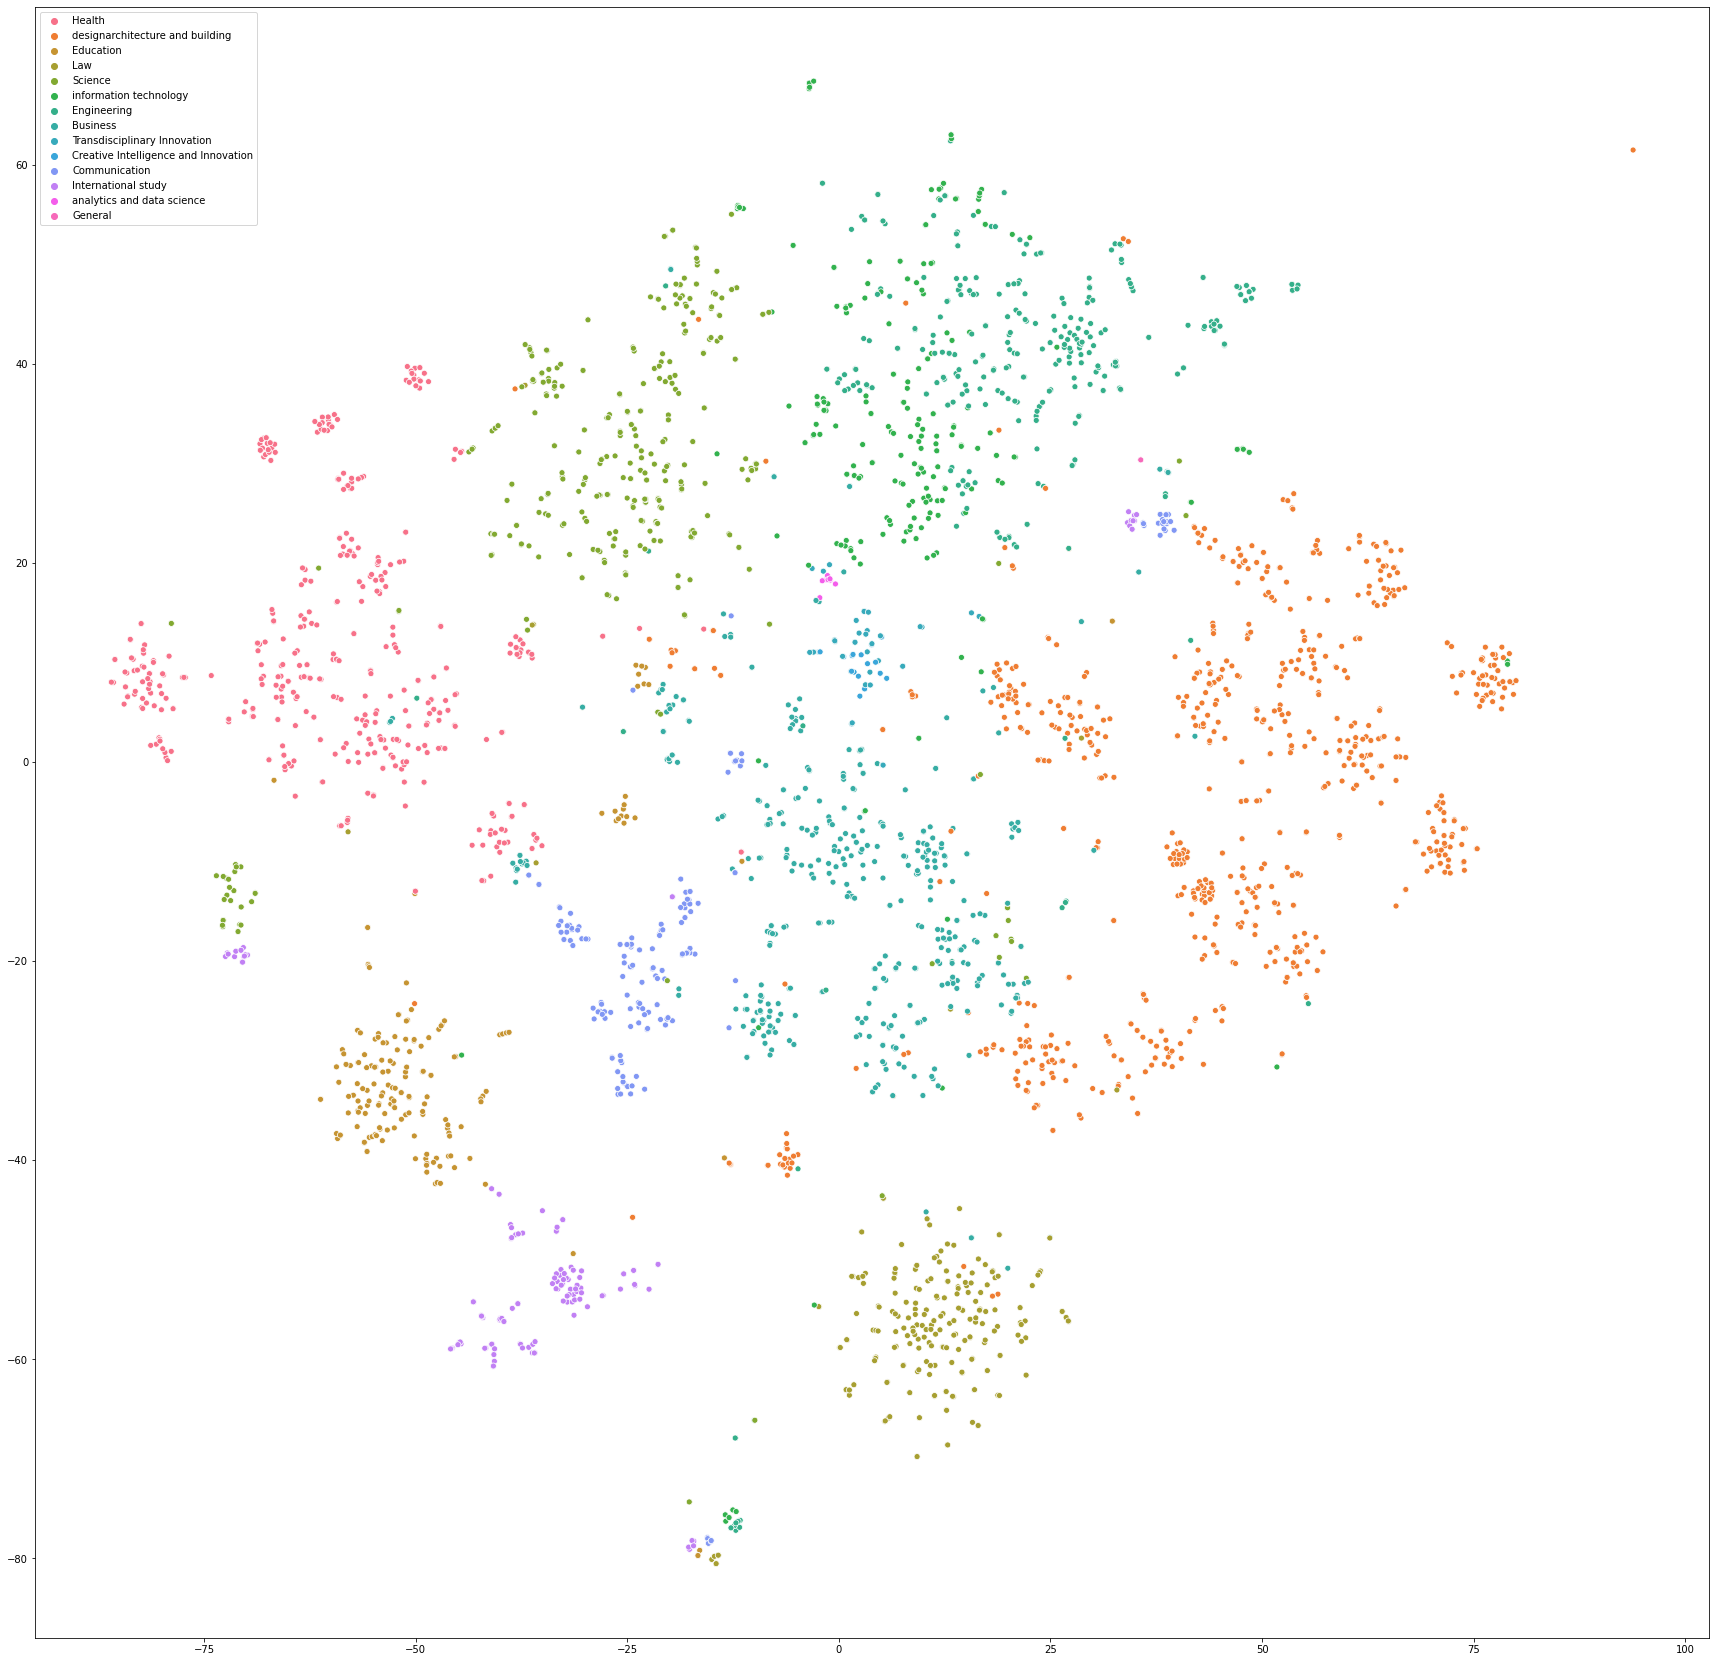

In [ ]:
plt.figure(figsize=(30,30))
sns.scatterplot(x=X, y=Y, hue= faculty_li)
plt.show()

In [ ]:
tsne2 = TSNE(n_components=2)
X_tsne2=tsne.fit_transform(vectors)

In [ ]:
X_list = X_tsne2.tolist()
X= [x[0] for x in X_list]
Y=[y[1] for y in X_list]
Y

In [ ]:
resultObj = 'try2.csv'
path_res = os.path.join(os.getcwd(), resultObj)

with open(path_res, 'w',newline='') as f:
  csv_header = ["X","Y"]
  csv_writer = csv.DictWriter(f, fieldnames=csv_header)
  for i in range(len(X)):
    csv_writer.writerow({"X":X[i], "Y":Y[i] })

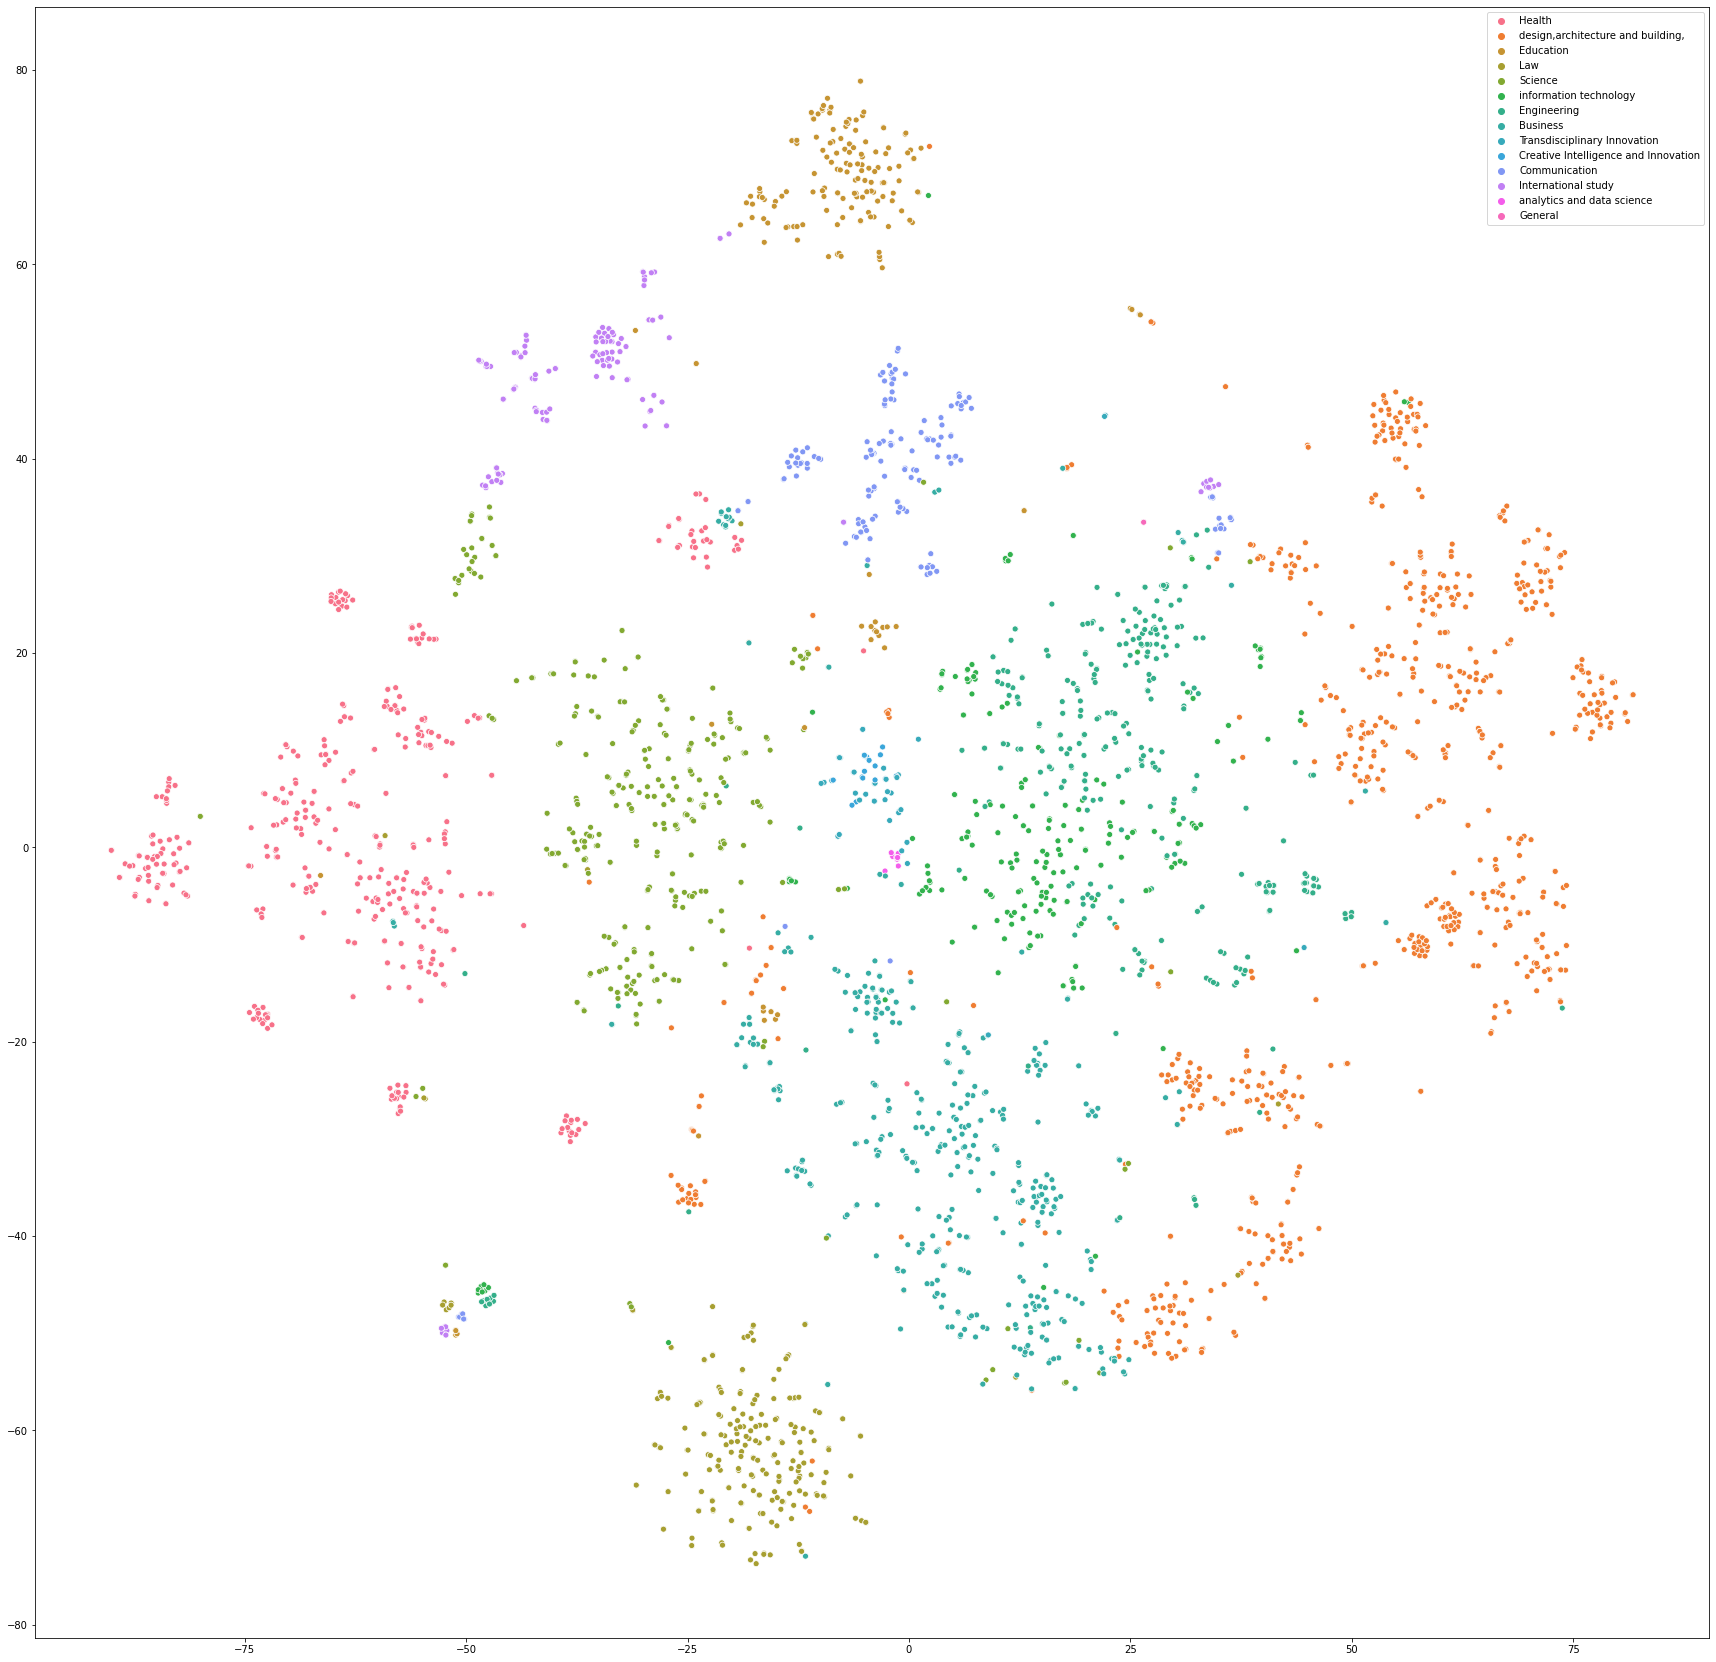

In [ ]:
plt.figure(figsize=(30,30))
sns.scatterplot(x=X, y=Y, hue= faculty_li)

plt.show()

In [ ]:
tsne3 = TSNE(n_components=2)
X_tsne3=tsne.fit_transform(vectors)

In [ ]:
X_list = X_tsne3.tolist()
X= [x[0] for x in X_list ]
#X
Y=[y[1] for y in X_list]
Y
resultObj = 'try3.csv'
path_res = os.path.join(os.getcwd(), resultObj)


with open(path_res, 'w',newline='') as f:
  csv_header = ["X","Y"]
  csv_writer = csv.DictWriter(f, fieldnames=csv_header)
  for i in range(len(X)):
    csv_writer.writerow({"X":X[i], "Y":Y[i] })

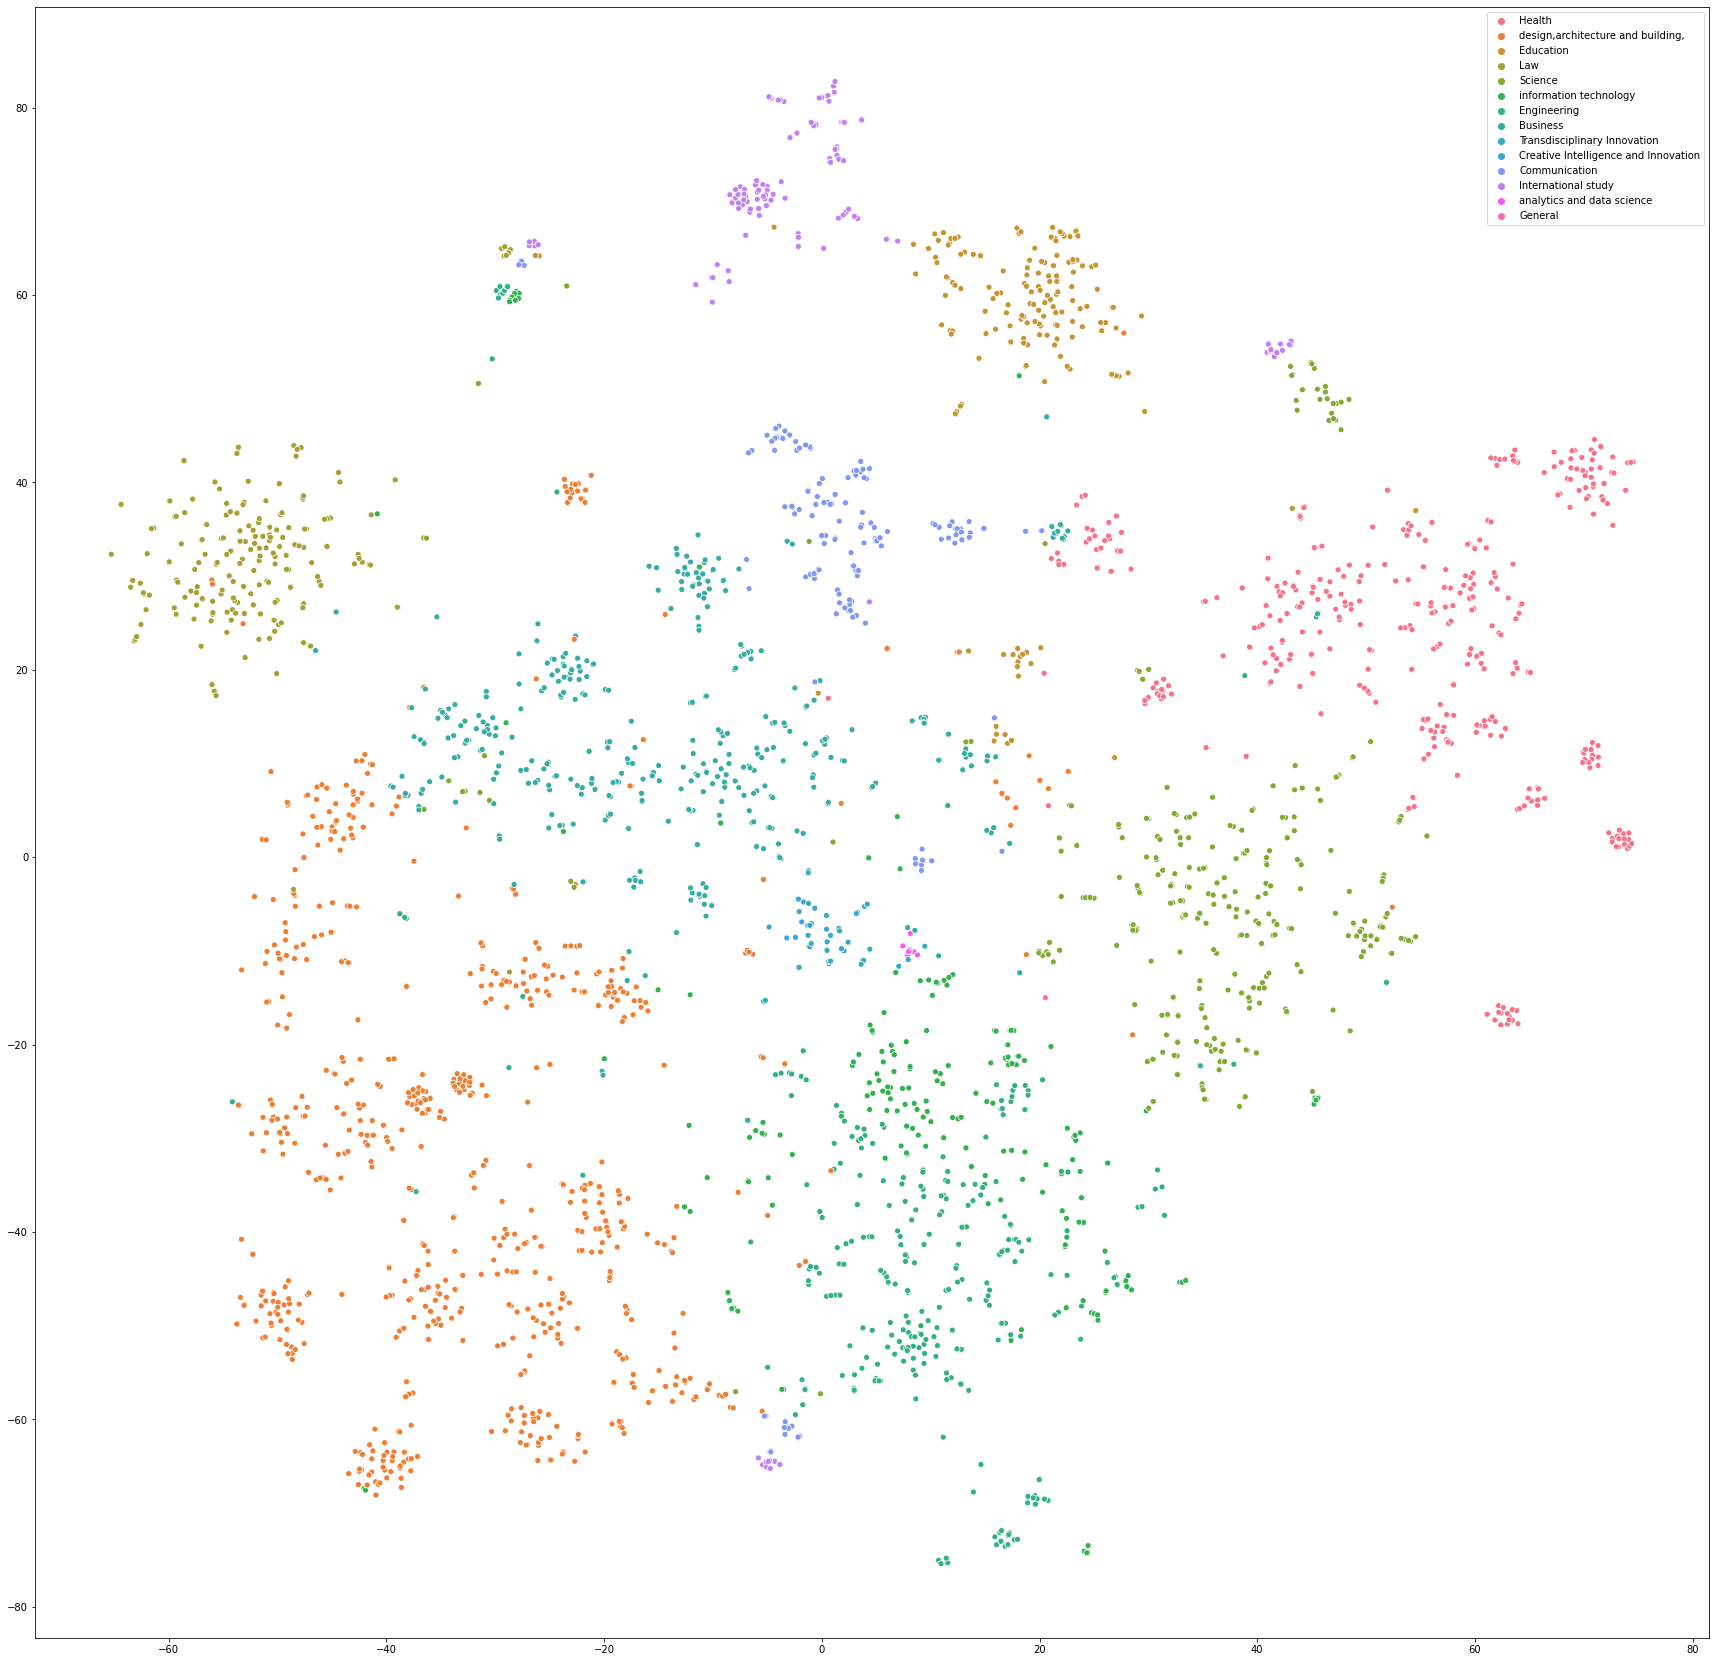

In [ ]:
plt.figure(figsize=(30,30))
sns.scatterplot(x=X, y=Y, hue= faculty_li)

plt.show()